In [1]:
!whoami

root


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

rawcsv = pd.read_csv('../input/starlink-satellites-launched/starlink_launched.csv', engine='python')
rawcsv.head()

,COSPAR,mission,version,date,site,altitude,inclination,deployed,working,outcome,vehicle
0,2018-020,Tintin,v0.1,2018/2/22,"VAFB, SLC-4E",514 km,97.5°,2,0,Success,F9 FT - B1038.2
1,2019-029,v0.9,v0.9,2019/5/24,"CCAFS, SLC-40",440–550 km,53.0°,60,0,Success,F9 B5 - B1049.3
2,2019-074,L1,v1.0,2019/11/11,"CCAFS, SLC-40",550 km,53.0°,60,50,Success,F9 B5 - B1048.4
3,2020-001,L2,v1.0,2020/1/7,"CCAFS, SLC-40",550 km,53.0°,60,47,Success,F9 B5 - B1049.4
4,2020-006,L3,v1.0,2020/1/29,"CCAFS, SLC-40",550 km,53.0°,60,49,Success,F9 B5 - B1051.3


In [3]:
date = np.array(rawcsv['date'].astype(str))
dnum = np.array(rawcsv['deployed'].astype(int))
wnum = np.array(rawcsv['working'].astype(int))

In [4]:
dsum = []
sum = 0
for x in dnum:
    sum = sum + x
    dsum.append(sum)

wsum = []
sum = 0
for x in wnum:
    sum = sum + x
    wsum.append(sum)

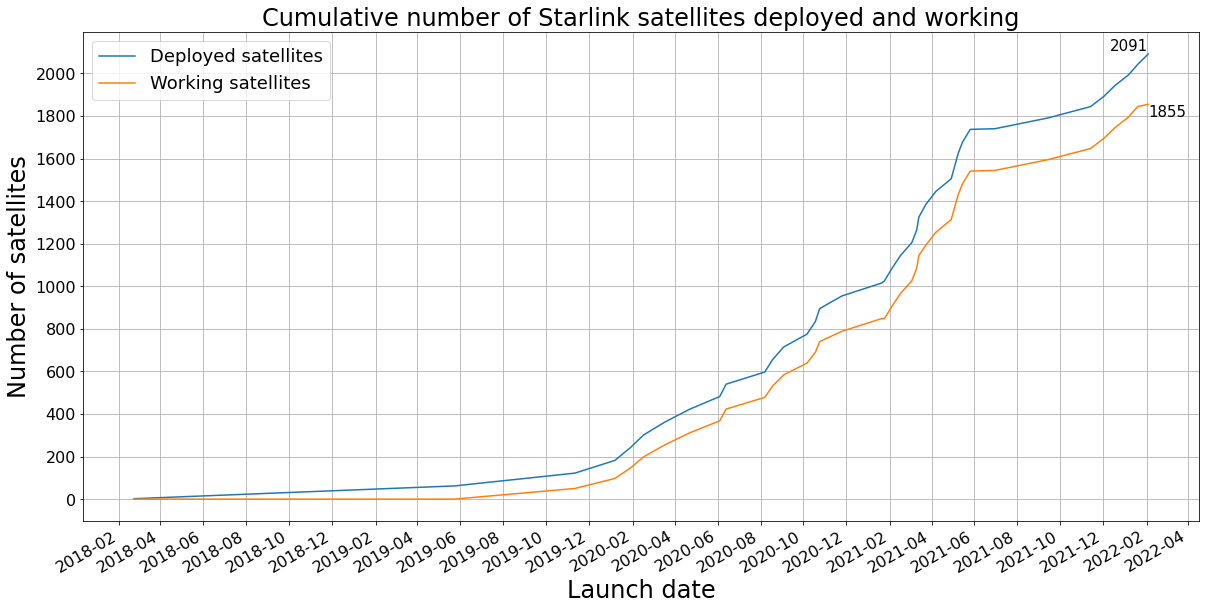

In [5]:
xaxis = [datetime.strptime(d, '%Y/%m/%d').date() for d in date]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xaxis, dsum, '-', label="Deployed satellites")
ax.plot(xaxis, wsum, '-', label="Working satellites")
plt.text(xaxis[-1], dsum[-1], dsum[-1], ha='right', va='bottom', fontsize=15)
plt.text(xaxis[-1], wsum[-1], wsum[-1], ha='left', va='top', fontsize=15)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))

#make it beautiful~
#legend
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 18,
}
plt.legend(prop=font1)

#ticks
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#label
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 24,
}
plt.xlabel('Launch date', font2)
plt.ylabel('Number of satellites', font2)

#title
plt.title("Cumulative number of Starlink satellites deployed and working", font2)

fig.autofmt_xdate()
plt.grid()

In [6]:
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

In [7]:
vlist = rawcsv['version']
c = Counter(vlist)
i = 0
for x in wnum:
    if(x == 0):
        c[vlist[i]] = c[vlist[i]] - 1
        if(c[vlist[i]] == 0):
            del c[vlist[i]]
    i = i + 1

(-1.103910630514467,
 1.1051724928315374,
 -1.1053395763861968,
 1.1002542885967936)

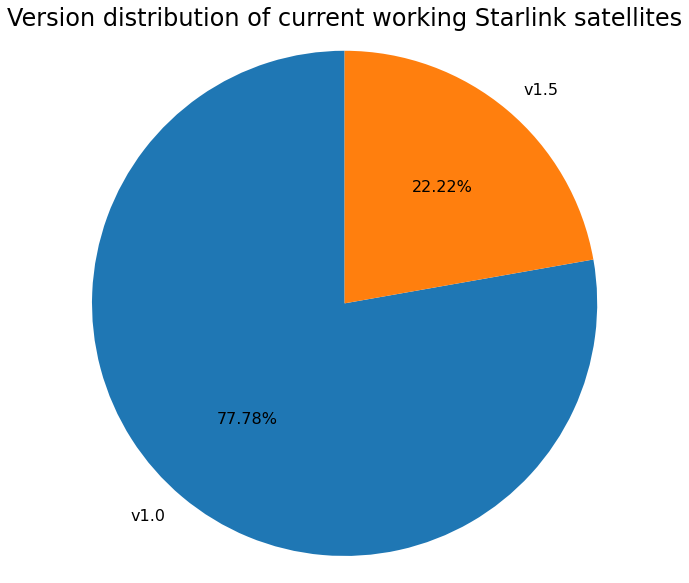

In [8]:
xaxis = [key for key in c]
vcounts = [value for value in c.values()]
plt.figure(figsize=(10, 10))
plt.pie(vcounts, labels=xaxis, autopct="%1.2f%%", textprops={'fontsize': 16},
        labeldistance=1.1, startangle=90)
plt.title("Version distribution of current working Starlink satellites", font2)
plt.axis('equal')

In [9]:
plt.savefig('pie.png')

<Figure size 432x288 with 0 Axes>

In [10]:
#try another apporach to deal "show by every two months" 
#not using subpie() or sth but process x-axis before graphing
date_df = pd.DataFrame(date, columns=['date'])
date_df['date'] = pd.to_datetime(date_df['date'])
date_df[1] = 1
date_df = date_df.set_index('date')
date_df = date_df.resample('2M').sum().to_period('M')
#date_df.reset_index(level=0, inplace=True) #do NOT forget after set_index!

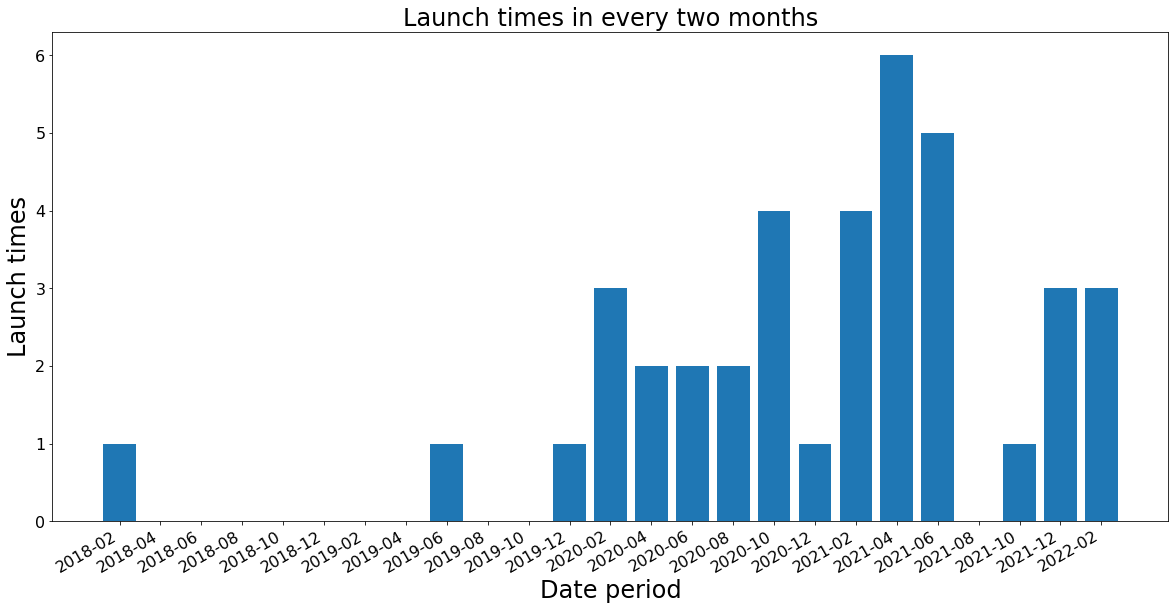

In [11]:
plt.figure(figsize=(20, 10))
plt.bar(date_df.index.strftime('%Y-%m'), date_df[1].tolist(), label='Launch times')

#ticks
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

plt.xlabel('Date period', font2)
plt.ylabel('Launch times', font2)
plt.title('Launch times in every two months', font2)
plt.gcf().autofmt_xdate()

In [12]:
plt.savefig('bar.png')

<Figure size 432x288 with 0 Axes>